# [Entrega #2] Preprocesamiento de Datos


## Descripción
En este proyecto, realizamos un preprocesamiento de los datos proporcionados. El objetivo es preparar los datos para el modelado posterior, rellenando valores faltantes, detectando y corrigiendo valores atu00edpicos, normalizando y escalando los datos, codificando variables categu00f3ricas y creando variables adicionales para mejorar el modelado.

## Objetivos
- Identificar y rellenar valores faltantes
- Detectar y corregir valores atu00edpicos (outliers)
- Normalizar y escalar los datos
- Codificar variables categu00f3ricas
- Crear variables adicionales para mejorar el modelado

## Metodología de Preprocesamiento

### 1. Carga y Exploración Inicial de Datos
- Cargamos los conjuntos de datos de entrenamiento y prueba
- Examinamos la estructura general de los datos (dimensiones, tipos de datos)
- Identificamos columnas categóricas y numéricas
- Analizamos la presencia de valores faltantes

### 2. Tratamiento de Valores Faltantes
- Identificamos columnas con valores faltantes
- Para variables numéricas: imputamos con la media de la columna
- Para variables categóricas: imputamos con la moda (valor más frecuente)
- Verificamos que no queden valores faltantes en el conjunto de datos

### 3. Detección y Tratamiento de Outliers
- Utilizamos el método del Rango Intercuartil (IQR)
- Calculamos los límites inferior y superior (Q1 - 1.5*IQR y Q3 + 1.5*IQR)
- Identificamos valores fuera de estos lu00edmites
- Aplicamos tu00e9cnicas de recorte (capping) para limitar los valores extremos

### 4. Codificación de Variables Categoricas
- Identificamos todas las variables categoricas
- Aplicamos codificación one-hot (variables dummy)
- Eliminamos una categoría de referencia para evitar multicolinealidad (drop_first=True)
- Aseguramos que el conjunto de prueba tenga las mismas columnas que el de entrenamiento

### 5. Normalización de Variables Numéricas
- Aplicamos normalización min-max para escalar todas las variables numéricas al rango [0,1]
- Utilizamos los valores mínimo y máximo del conjunto de entrenamiento para normalizar también el conjunto de prueba
- Verificamos que todas las variables estén correctamente escaladas

## Datos
Los datos contienen información sobre rendimiento académico clasificado en diferentes categorías (bajo, medio-bajo, medio-alto, alto), junto con diversas variables predictoras que pueden influir en dicho rendimiento.

## Implementación
Todo el proceso de preprocesamiento está implementado en el notebook **02 - preprocesado.ipynb**, que incluye:

- Funciones modulares para cada paso del preprocesamiento
- Visualizaciones para entender mejor los datos
- Verificaciones en cada etapa para garantizar la calidad de los datos
- Flujo paso a paso para mayor claridad y control del proceso

## Video de Avance del Proyecto
[Enlace al video en YouTube](https://www.youtube.com/watch?v=XXXX) - Este video explica el estado actual del proyecto, las dificultades encontradas y los próximos pasos a seguir.


In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
# 1. Cargar los datos
def cargar_datos(ruta_train):
    """
    Carga el conjunto de datos de entrenamiento desde un archivo CSV.
    
    Args:
        ruta_train (str): Ruta al archivo CSV de entrenamiento
        
    Returns:
        pandas.DataFrame: DataFrame de entrenamiento
    """
    train_df = pd.read_csv(ruta_train)
    
    print(f"Forma de los datos de entrenamiento: {train_df.shape}")
    
    return train_df

train_df = cargar_datos('/home/jp/Repositorios/InteligenciaArtificial-UdeA20251/Data/train.csv')
display(train_df)

Forma de los datos de entrenamiento: (692500, 21)


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,...,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,...,N,Si,Si,No,Primaria completa,bajo,0.132,0.426,0.261,0.328


In [125]:
import pandas as pd
import numpy as np # Asegúrate de importar numpy si no lo has hecho

def imputar_datos_faltantes(df):
    """
    Imputa los valores faltantes (NaN) en un DataFrame.
    - Rellena NaNs en columnas numéricas con la media.
    - Rellena NaNs en columnas categóricas con la moda.

    Args:
        df (pandas.DataFrame): DataFrame de entrada con posibles valores NaN.

    Returns:
        pandas.DataFrame: DataFrame con los valores NaN imputados.
    """
    # Crear una copia para no modificar el DataFrame original
    df_imputado = df.copy()

    print("--- Iniciando imputación de valores faltantes ---")
    columnas_imputadas = 0
    # Iterar sobre cada columna del DataFrame
    for columna in df_imputado.columns:
        # Verificar si la columna tiene valores NaN
        nan_count = df_imputado[columna].isnull().sum()
        if nan_count > 0:
            columnas_imputadas += 1
            print(f"  Imputando {nan_count} NaNs en columna '{columna}'...", end=" ")
            # Verificar si la columna es numérica
            if pd.api.types.is_numeric_dtype(df_imputado[columna]):
                # Calcular la media
                media = df_imputado[columna].mean()
                # Imputar con la media
                df_imputado[columna].fillna(media, inplace=True)
                print(f"usando la media ({media:.2f}).")
            else: # Si no es numérica, asumimos que es categórica
                # Calcular la moda
                moda = df_imputado[columna].mode()
                # Asegurarse de que la moda no esté vacía
                if not moda.empty:
                    valor_moda = moda[0]
                    # Imputar con la moda
                    df_imputado[columna].fillna(valor_moda, inplace=True)
                    print(f"usando la moda ('{valor_moda}').")
                else:
                    # Manejar el caso de columnas categóricas con solo NaNs
                    # Llenar con un marcador de posición o decidir otra estrategia
                    df_imputado[columna].fillna('Desconocido', inplace=True)
                    print(f"\n    Advertencia: La columna categórica '{columna}' contenía solo NaNs. Se imputó con 'Desconocido'.")

    if columnas_imputadas == 0:
        print("No se encontraron valores faltantes para imputar.")
    else:
         print(f"--- Imputación completada para {columnas_imputadas} columnas ---")

    return df_imputado

# --- Ejemplo de cómo usarla ---
# Suponiendo que tu DataFrame se llama train_df
print("Valores faltantes ANTES de la imputación:")
print(train_df.isnull().sum())
print(f"\nTotal de valores faltantes ANTES: {train_df.isnull().sum().sum()}\n")


train_df_imputado = imputar_datos_faltantes(train_df)

# --- Verificación después de la imputación ---
print("\nValores faltantes DESPUÉS de la imputación:")
missing_after = train_df_imputado.isnull().sum()
print(missing_after)

total_missing_after = missing_after.sum()
print(f"\nTotal de valores faltantes DESPUÉS: {total_missing_after}")

if total_missing_after == 0:
    print("\n¡Verificación exitosa! No quedan valores faltantes en el DataFrame.")
else:
    print(f"\nAdvertencia: Aún quedan {total_missing_after} valores faltantes. Revisa las columnas con NaNs.")
    print(missing_after[missing_after > 0])
    
display(train_df_imputado)


Valores faltantes ANTES de la imputación:
ID                                    0
PERIODO                               0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_TIENELAVADORA                39773
FAMI_TIENEAUTOMOVIL               43623
ESTU_PRIVADO_LIBERTAD                 0
ESTU_PAGOMATRICULAPROPIO           6498
FAMI_TIENECOMPUTADOR              38103
FAMI_TIENEINTERNET.1              26629
FAMI_EDUCACIONMADRE               23664
RENDIMIENTO_GLOBAL                    0
coef_1                                0
coef_2                                0
coef_3                                0
coef_4                                0
dtype: int64

Total de valores faltantes ANTES: 297378

--- Iniciando imputación de valores faltantes ---
  Imputando 

/tmp/ipykernel_51803/2070938618.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputado[columna].fillna(valor_moda, inplace=True)


usando la moda ('Estrato 2').
  Imputando 26629 NaNs en columna 'FAMI_TIENEINTERNET'... usando la moda ('Si').
  Imputando 23178 NaNs en columna 'FAMI_EDUCACIONPADRE'... usando la moda ('Secundaria (Bachillerato) completa').
  Imputando 39773 NaNs en columna 'FAMI_TIENELAVADORA'... usando la moda ('Si').
  Imputando 43623 NaNs en columna 'FAMI_TIENEAUTOMOVIL'... usando la moda ('No').
  Imputando 6498 NaNs en columna 'ESTU_PAGOMATRICULAPROPIO'... usando la moda ('No').
  Imputando 38103 NaNs en columna 'FAMI_TIENECOMPUTADOR'... usando la moda ('Si').
  Imputando 26629 NaNs en columna 'FAMI_TIENEINTERNET.1'... usando la moda ('Si').
  Imputando 23664 NaNs en columna 'FAMI_EDUCACIONMADRE'... usando la moda ('Secundaria (Bachillerato) completa').
--- Imputación completada para 11 columnas ---

Valores faltantes DESPUÉS de la imputación:
ID                                0
PERIODO                           0
ESTU_PRGM_ACADEMICO               0
ESTU_PRGM_DEPARTAMENTO            0
ESTU_VALOR

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,...,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,...,N,Si,Si,No,Primaria completa,bajo,0.132,0.426,0.261,0.328


In [126]:
import pandas as pd
import numpy as np

def eliminar_outliers_iqr(df):
    """
    Elimina filas de un DataFrame que contienen outliers en columnas numéricas, 
    basado en el método del Rango Intercuartílico (IQR).

    Args:
        df (pd.DataFrame): DataFrame de entrada.

    Returns:
        pd.DataFrame: DataFrame sin las filas que contenían outliers.
    """
    # Crear una copia para no modificar el original
    df_limpio = df.copy()
    
    print(f"--- Iniciando eliminación de outliers usando IQR ---")
    print(f"Tamaño original del DataFrame: {df.shape[0]} filas")
    
    # Obtener columnas numéricas
    numerical_cols = df.select_dtypes(include=np.number).columns
    
    if numerical_cols.empty:
        print("No se encontraron columnas numéricas. No se eliminaron outliers.")
        return df_limpio

    # Inicializar una máscara booleana para mantener todas las filas inicialmente
    mascara_sin_outliers = pd.Series([True] * len(df_limpio), index=df_limpio.index)

    total_outliers_detectados = 0

    # Iterar sobre cada columna numérica para identificar outliers
    for col in numerical_cols:
        # Calcular Q1, Q3 e IQR
        Q1 = df_limpio[col].quantile(0.25)
        Q3 = df_limpio[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Definir límites
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identificar outliers en esta columna
        outliers_columna = (df_limpio[col] < lower_bound) | (df_limpio[col] > upper_bound)
        num_outliers_col = outliers_columna.sum()
        
        if num_outliers_col > 0:
            print(f"  Detectados {num_outliers_col} outliers en '{col}' (límites: [{lower_bound:.2f}, {upper_bound:.2f}])")
            # Actualizar la máscara general: marcar como False las filas que son outliers en ESTA columna
            # Usamos el operador AND (&) para acumular las condiciones (una fila se elimina si es outlier en CUALQUIER columna)
            mascara_sin_outliers = mascara_sin_outliers & (~outliers_columna)
            total_outliers_detectados += num_outliers_col # Nota: esto cuenta outliers por columna, no filas únicas eliminadas
        
    # Filtrar el DataFrame usando la máscara acumulada
    df_filtrado = df_limpio[mascara_sin_outliers]
    
    filas_eliminadas = len(df_limpio) - len(df_filtrado)
    
    print(f"\nTotal de filas eliminadas por contener outliers: {filas_eliminadas}")
    print(f"Tamaño final del DataFrame: {df_filtrado.shape[0]} filas")
    print(f"--- Eliminación de outliers completada ---")
    
    return df_filtrado

train_df_sin_outliers = eliminar_outliers_iqr(train_df_imputado)


--- Iniciando eliminación de outliers usando IQR ---
Tamaño original del DataFrame: 692500 filas
  Detectados 68120 outliers en 'coef_1' (límites: [0.04, 0.48])
  Detectados 34162 outliers en 'coef_2' (límites: [0.07, 0.45])
  Detectados 36488 outliers en 'coef_3' (límites: [0.20, 0.35])
  Detectados 71389 outliers en 'coef_4' (límites: [0.18, 0.38])

Total de filas eliminadas por contener outliers: 85658
Tamaño final del DataFrame: 606842 filas
--- Eliminación de outliers completada ---


/tmp/ipykernel_51803/3626848485.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(datos_boxplot, labels=['Original', 'Después del Tratamiento'])
/tmp/ipykernel_51803/3626848485.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(datos_boxplot, labels=['Original', 'Después del Tratamiento'])
/tmp/ipykernel_51803/3626848485.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(datos_boxplot, labels=['Original', 'Después del Tratamiento'])
/tmp/ipykernel_51803/3626848485.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplo

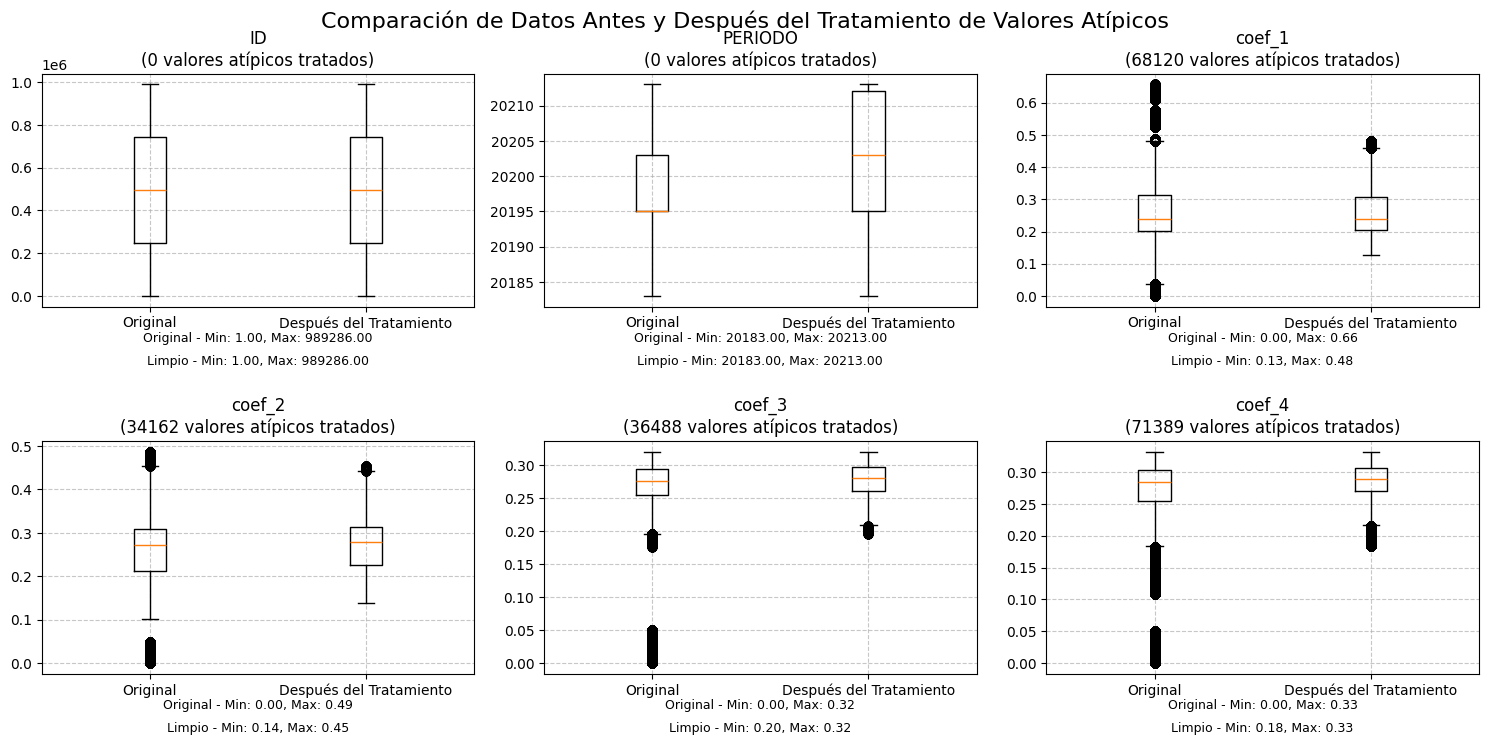

,Columna,Cantidad de Outliers,Outliers (%),Min Original,Max Original,Min Limpio,Max Limpio,Límite Inferior,Límite Superior
0,ID,0,0.00%,1.0,989286.000,1.000,989286.000,-494361.8750,1.483469e+06
1,PERIODO,0,0.00%,20183.0,20213.000,20183.000,20213.000,20183.0000,2.021500e+04
2,coef_1,68120,9.84%,0.0,0.657,0.128,0.480,0.0365,4.805000e-01
3,coef_2,34162,4.93%,0.0,0.487,0.138,0.454,0.0665,4.545000e-01
4,coef_3,36488,5.27%,0.0,0.320,0.196,0.320,0.1955,3.515000e-01
5,coef_4,71389,10.31%,0.0,0.332,0.184,0.332,0.1830,3.750000e-01


In [132]:
# Comparación de datos antes y después del tratamiento de valores atípicos
def comparar_tratamiento_outliers(train_df, train_df_limpio):
    """
    Muestra una comparación de los datos antes y después del tratamiento de valores atípicos
    """
    # Obtener columnas numéricas
    columnas_numericas = train_df.select_dtypes(include=['int64', 'float64']).columns
    
    # Crear una figura con múltiples subgráficos
    n_cols = min(3, len(columnas_numericas))  # Máximo 3 columnas por fila
    n_filas = (len(columnas_numericas) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_filas, n_cols, figsize=(15, 4 * n_filas))
    if n_filas == 1 and n_cols == 1:
        axes = np.array([axes])
    axes = axes.flatten()
    
    # Para cada columna numérica, crear una comparación de diagrama de caja
    for i, col in enumerate(columnas_numericas):
        if i < len(axes):
            ax = axes[i]
            
            # Calcular IQR para los datos originales
            Q1 = train_df[col].quantile(0.25)
            Q3 = train_df[col].quantile(0.75)
            IQR = Q3 - Q1
            limite_inferior = Q1 - 1.5 * IQR
            limite_superior = Q3 + 1.5 * IQR
            
            # Contar valores atípicos en los datos originales
            cantidad_outliers = ((train_df[col] < limite_inferior) | (train_df[col] > limite_superior)).sum()
            
            # Crear una comparación de diagrama de caja
            datos_boxplot = [train_df[col], train_df_limpio[col]]
            ax.boxplot(datos_boxplot, labels=['Original', 'Después del Tratamiento'])
            ax.set_title(f'{col}\n({cantidad_outliers} valores atípicos tratados)')
            ax.grid(True, linestyle='--', alpha=0.7)
            
            # Añadir algunas estadísticas
            stats_original = f"Original - Min: {train_df[col].min():.2f}, Max: {train_df[col].max():.2f}"
            stats_limpio = f"Limpio - Min: {train_df_limpio[col].min():.2f}, Max: {train_df_limpio[col].max():.2f}"
            ax.annotate(stats_original, xy=(0.5, -0.15), xycoords='axes fraction', 
                        ha='center', fontsize=9)
            ax.annotate(stats_limpio, xy=(0.5, -0.25), xycoords='axes fraction', 
                        ha='center', fontsize=9)
    
    # Ocultar cualquier subgráfico no utilizado
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.suptitle('Comparación de Datos Antes y Después del Tratamiento de Valores Atípicos', fontsize=16)
    plt.subplots_adjust(top=0.9, bottom=0.15)
    plt.show()
    
    # Crear una tabla con estadísticas detalladas
    datos_estadisticas = []
    for col in columnas_numericas:
        # Calcular IQR y límites
        Q1 = train_df[col].quantile(0.25)
        Q3 = train_df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        
        # Contar valores atípicos
        cantidad_outliers = ((train_df[col] < limite_inferior) | (train_df[col] > limite_superior)).sum()
        porcentaje_outliers = (cantidad_outliers / len(train_df)) * 100
        
        # Calcular estadísticas
        datos_estadisticas.append({
            'Columna': col,
            'Cantidad de Outliers': cantidad_outliers,
            'Outliers (%)': f"{porcentaje_outliers:.2f}%",
            'Min Original': train_df[col].min(),
            'Max Original': train_df[col].max(),
            'Min Limpio': train_df_limpio[col].min(),
            'Max Limpio': train_df_limpio[col].max(),
            'Límite Inferior': limite_inferior,
            'Límite Superior': limite_superior
        })
    
    # Crear y mostrar el DataFrame de estadísticas
    df_estadisticas = pd.DataFrame(datos_estadisticas)
    display(df_estadisticas)

# Llamar a la función para mostrar la comparación
comparar_tratamiento_outliers(train_df, train_df_sin_outliers)

In [133]:
import unicodedata
import pandas as pd
import numpy as np
import time

def eliminar_acentos(df, columnas_especificas=None, incluir_nombres_columnas=True, 
                    reemplazar_enie=True, conservar_mayusculas=True, mostrar_progreso=True):
    """
    Elimina acentos (tildes) y caracteres especiales de un DataFrame.
    
    Parámetros:
    -----------
    df : pandas.DataFrame
        El DataFrame a procesar.
    columnas_especificas : list, optional
        Lista de columnas específicas a procesar. Si es None, procesa todas las columnas de tipo texto.
    incluir_nombres_columnas : bool, default=True
        Si es True, también elimina acentos de los nombres de las columnas.
    reemplazar_enie : bool, default=True
        Si es True, reemplaza 'ñ' por 'n' y 'Ñ' por 'N'.
    conservar_mayusculas : bool, default=True
        Si es True, mantiene las mayúsculas/minúsculas originales.
    mostrar_progreso : bool, default=True
        Si es True, muestra información sobre el progreso del procesamiento.
    
    Devuelve:
    ---------
    pandas.DataFrame
        Un nuevo DataFrame con los acentos eliminados según los parámetros especificados.
    dict
        Un diccionario con estadísticas sobre los cambios realizados.
    """
    tiempo_inicio = time.time()
    
    # Crear una copia para evitar modificar el original
    df_limpio = df.copy()
    
    # Estadísticas para el informe final
    estadisticas = {
        'filas_procesadas': len(df),
        'columnas_procesadas': 0,
        'valores_modificados': 0,
        'nombres_columnas_modificados': 0
    }
    
    # Función para eliminar acentos y caracteres especiales de una cadena
    def quitar_acentos(texto):
        if not isinstance(texto, str):
            return texto
        
        try:
            # Normalizar a forma descompuesta (carácter + acento separados)
            texto_norm = unicodedata.normalize('NFD', texto)
            # Eliminar todas las marcas de acento
            texto_sin_acentos = ''.join(c for c in texto_norm if not unicodedata.combining(c))
            
            # Reemplazar ñ/Ñ si se solicita
            if reemplazar_enie:
                texto_sin_acentos = texto_sin_acentos.replace('ñ', 'n').replace('Ñ', 'N')
            
            # Volver a la forma compuesta
            resultado = unicodedata.normalize('NFC', texto_sin_acentos)
            
            # Verificar si hubo cambios
            return resultado
        except Exception as e:
            print(f"Error al procesar texto '{texto}': {e}")
            return texto
    
    # Determinar qué columnas procesar
    if columnas_especificas is not None:
        # Verificar que las columnas especificadas existan
        columnas_validas = [col for col in columnas_especificas if col in df_limpio.columns]
        if len(columnas_validas) < len(columnas_especificas):
            columnas_faltantes = set(columnas_especificas) - set(columnas_validas)
            print(f"Advertencia: Las siguientes columnas no existen en el DataFrame: {columnas_faltantes}")
        columnas_a_procesar = columnas_validas
    else:
        # Seleccionar todas las columnas de tipo objeto (texto)
        columnas_a_procesar = df_limpio.select_dtypes(include='object').columns.tolist()
    
    # Eliminar acentos de los nombres de columnas si se solicita
    if incluir_nombres_columnas:
        nombres_originales = list(df_limpio.columns)
        nombres_nuevos = [quitar_acentos(col) for col in nombres_originales]
        
        # Contar cuántos nombres de columnas cambiaron
        nombres_cambiados = sum(1 for orig, nuevo in zip(nombres_originales, nombres_nuevos) if orig != nuevo)
        estadisticas['nombres_columnas_modificados'] = nombres_cambiados
        
        if nombres_cambiados > 0 and mostrar_progreso:
            print(f"Se modificaron {nombres_cambiados} nombres de columnas para eliminar acentos.")
        
        # Actualizar los nombres de las columnas
        df_limpio.columns = nombres_nuevos
    
    # Procesar las columnas seleccionadas
    total_valores_modificados = 0
    
    if mostrar_progreso and len(columnas_a_procesar) > 0:
        print(f"Procesando {len(columnas_a_procesar)} columnas de texto...")
    
    for col in columnas_a_procesar:
        # Guardar valores originales para comparación
        valores_originales = df_limpio[col].copy()
        
        # Aplicar la función para eliminar acentos
        df_limpio[col] = df_limpio[col].apply(quitar_acentos)
        
        # Contar cuántos valores cambiaron
        valores_cambiados = (valores_originales != df_limpio[col]).sum()
        total_valores_modificados += valores_cambiados
        
        if mostrar_progreso and valores_cambiados > 0:
            porcentaje = (valores_cambiados / len(df)) * 100
            print(f"  Columna '{col}': {valores_cambiados} valores modificados ({porcentaje:.2f}%)")
    
    estadisticas['columnas_procesadas'] = len(columnas_a_procesar)
    estadisticas['valores_modificados'] = total_valores_modificados
    
    # Mostrar resumen final
    tiempo_total = time.time() - tiempo_inicio
    
    if mostrar_progreso:
        print(f"\nResumen del proceso de eliminación de acentos:")
        print(f"- Tiempo de procesamiento: {tiempo_total:.2f} segundos")
        print(f"- Filas procesadas: {estadisticas['filas_procesadas']}")
        print(f"- Columnas de texto procesadas: {estadisticas['columnas_procesadas']}")
        print(f"- Valores de texto modificados: {estadisticas['valores_modificados']}")
        print(f"- Nombres de columnas modificados: {estadisticas['nombres_columnas_modificados']}")
    
    return df_limpio, estadisticas

# Ejemplo de uso básico
train_df_sin_acentos, stats = eliminar_acentos(train_df)



# Mostrar un ejemplo de los cambios realizados
if 'ESTU_PRGM_DEPARTAMENTO' in train_df.columns:
    comparacion = pd.DataFrame({
        'Original': train_df['ESTU_PRGM_DEPARTAMENTO'].head(10),
        'Sin Acentos': train_df_sin_acentos['ESTU_PRGM_DEPARTAMENTO'].head(10)
    })
    print("\nEjemplo de eliminación de acentos:")
    display(comparacion)

# Verificar si alguna columna cambió su nombre
columnas_cambiadas = {(col_orig, col_nuevo) for col_orig, col_nuevo in 
                      zip(train_df.columns, train_df_sin_acentos.columns) 
                      if col_orig != col_nuevo}

if columnas_cambiadas:
    print("\nColumnas cuyos nombres cambiaron después de eliminar acentos:")
    for viejo, nuevo in columnas_cambiadas:
        print(f"  {viejo} → {nuevo}")
        
display(train_df_clean_no_outliers_no_accents)

Procesando 15 columnas de texto...
  Columna 'ESTU_PRGM_ACADEMICO': 129207 valores modificados (18.66%)
  Columna 'ESTU_PRGM_DEPARTAMENTO': 295613 valores modificados (42.69%)
  Columna 'ESTU_VALORMATRICULAUNIVERSIDAD': 376581 valores modificados (54.38%)
  Columna 'ESTU_HORASSEMANATRABAJA': 280209 valores modificados (40.46%)
  Columna 'FAMI_ESTRATOVIVIENDA': 32137 valores modificados (4.64%)
  Columna 'FAMI_TIENEINTERNET': 26629 valores modificados (3.85%)
  Columna 'FAMI_EDUCACIONPADRE': 218926 valores modificados (31.61%)
  Columna 'FAMI_TIENELAVADORA': 39773 valores modificados (5.74%)
  Columna 'FAMI_TIENEAUTOMOVIL': 43623 valores modificados (6.30%)
  Columna 'ESTU_PAGOMATRICULAPROPIO': 6498 valores modificados (0.94%)
  Columna 'FAMI_TIENECOMPUTADOR': 38103 valores modificados (5.50%)
  Columna 'FAMI_TIENEINTERNET.1': 26629 valores modificados (3.85%)
  Columna 'FAMI_EDUCACIONMADRE': 248535 valores modificados (35.89%)

Resumen del proceso de eliminación de acentos:
- Tiempo de

,Original,Sin Acentos
0,BOGOTÁ,BOGOTA
1,ATLANTICO,ATLANTICO
2,BOGOTÁ,BOGOTA
3,SANTANDER,SANTANDER
4,ANTIOQUIA,ANTIOQUIA
5,ANTIOQUIA,ANTIOQUIA
6,HUILA,HUILA
7,BOGOTÁ,BOGOTA
8,ATLANTICO,ATLANTICO
9,ANTIOQUIA,ANTIOQUIA


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTA,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Tecnica o tecnologica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Tecnica o tecnologica completa,Si,...,N,No,Si,No,Tecnica o tecnologica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTA,Entre 2.5 millones y menos de 4 millones,Mas de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
6,47159,20183,INGENIERIA MECANICA,HUILA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Educacion profesional incompleta,Si,...,N,Si,Si,Si,Tecnica o tecnologica completa,alto,0.242,0.299,0.267,0.308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692494,649690,20212,LICENCIATURA EN EDUCACION BASICA CON ENFASIS E...,NORTE SANTANDER,Menos de 500 mil,Entre 21 y 30 horas,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) completa,bajo,0.312,0.209,0.290,0.265
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millon,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Mas de 30 horas,Estrato 3,Si,Primaria incompleta,Si,...,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACION EN SALUD OCUPACIONAL,BOGOTA,Entre 1 millon y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287



✅ Columna 'FAMI_ESTRATOVIVIENDA' convertida a valores numéricos:


,Original,Convertido
0,Estrato 3,3.0
1,Estrato 3,3.0
2,Estrato 3,3.0
3,Estrato 4,4.0
4,Estrato 3,3.0


  • Valores únicos originales: 7
  • Valores únicos después de la conversión: 7
  • Valores nulos antes: 32137
  • Valores nulos después: 32137
  • Tipo de datos resultante: float64


/tmp/ipykernel_51803/371754289.py:200: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df_resultado[col_destino].fillna(-999),
/tmp/ipykernel_51803/371754289.py:224: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


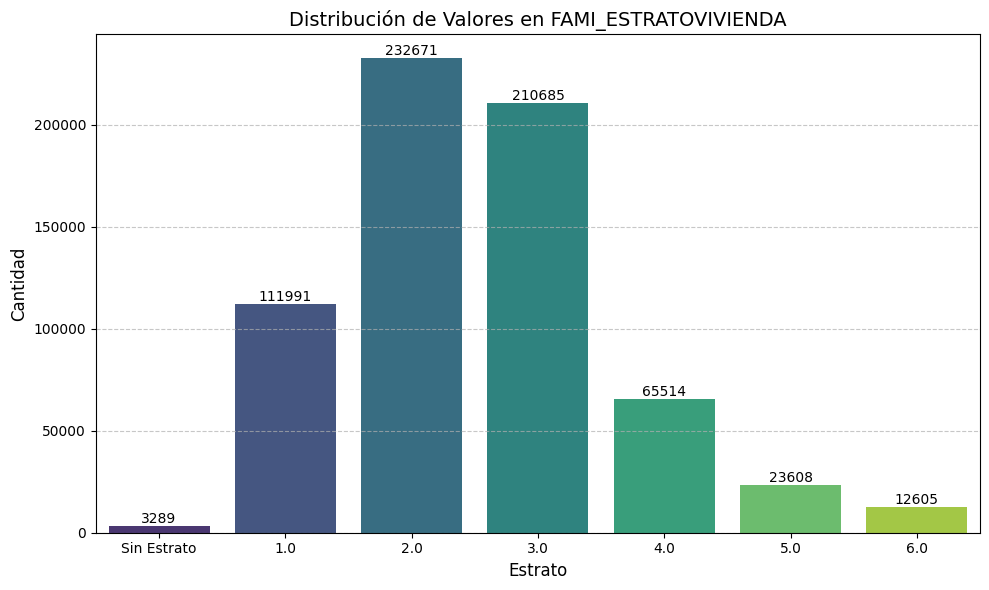


📊 Estadísticas para 'FAMI_ESTRATOVIVIENDA':


count    660363.000000
mean          2.521513
std           1.122754
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           6.000000
Name: FAMI_ESTRATOVIVIENDA, dtype: float64


✅ Columna 'FAMI_ESTRATOVIVIENDA' convertida a valores numéricos:


,Original,Convertido
0,Estrato 3,3
1,Estrato 3,3
2,Estrato 3,3
4,Estrato 3,3
6,Estrato 2,2


  • Valores únicos originales: 5
  • Valores únicos después de la conversión: 5
  • Valores nulos antes: 0
  • Valores nulos después: 0
  • Tipo de datos resultante: int64

Tipo de datos de 'FAMI_ESTRATOVIVIENDA' después de la conversión: float64


In [135]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def convertir_estrato_a_numerico(df, columna='FAMI_ESTRATOVIVIENDA', 
                                crear_nueva_columna=False, 
                                prefijo_nueva_columna='NUM_',
                                mapeo_personalizado=None,
                                visualizar_distribucion=True,
                                valor_predeterminado=None):
    """
    Convierte columnas de estrato socioeconómico de formato texto a valores numéricos.
    
    Esta función puede procesar formatos como 'Estrato 3', 'Nivel 2', 'Est. 5', etc.,
    extrayendo automáticamente los valores numéricos.
    
    Parámetros:
    -----------
    df : pandas.DataFrame
        El DataFrame que contiene la columna de estrato a convertir.
    columna : str o list, default='FAMI_ESTRATOVIVIENDA'
        Nombre de la columna o lista de columnas a convertir.
    crear_nueva_columna : bool, default=False
        Si es True, crea una nueva columna con el resultado en lugar de modificar la original.
    prefijo_nueva_columna : str, default='NUM_'
        Prefijo para la nueva columna si crear_nueva_columna=True.
    mapeo_personalizado : dict, optional
        Diccionario opcional para mapear valores específicos (ej: {'Estrato 1': 1, 'Sin Estrato': 0}).
    visualizar_distribucion : bool, default=True
        Si es True, muestra un gráfico de la distribución de valores después de la conversión.
    valor_predeterminado : int o float, optional
        Valor a asignar cuando no se puede extraer un número (None = usar NaN).
    
    Devuelve:
    ---------
    pandas.DataFrame
        DataFrame con la(s) columna(s) convertida(s) a valores numéricos.
    dict
        Diccionario con estadísticas y mapeos utilizados en la conversión.
    """
    # Crear una copia para evitar modificar el original
    df_resultado = df.copy()
    
    # Convertir columna a lista si es un string
    if isinstance(columna, str):
        columnas = [columna]
    else:
        columnas = columna
    
    # Diccionario para almacenar estadísticas y mapeos
    resultados = {
        'columnas_procesadas': [],
        'mapeos_aplicados': {},
        'valores_no_convertibles': {},
        'distribucion': {}
    }
    
    # Función para extraer el valor numérico de una cadena
    def extraer_numero_estrato(valor):
        # Si es NaN, devolver como está
        if pd.isna(valor):
            return valor
        
        # Si ya es un número, devolverlo directamente
        if isinstance(valor, (int, float)):
            return valor
        
        # Si es una cadena, intentar extraer el número
        if isinstance(valor, str):
            # Primero intentar con el mapeo personalizado si existe
            if mapeo_personalizado and valor in mapeo_personalizado:
                return mapeo_personalizado[valor]
            
            # Patrones comunes para estratos (más específicos primero)
            patrones = [
                r'estrato\s*(\d+)',  # "estrato 3", "Estrato3"
                r'est\.?\s*(\d+)',   # "Est. 3", "Est3"
                r'nivel\s*(\d+)',    # "nivel 3", "Nivel 3"
                r'(\d+)',            # Cualquier número en la cadena
            ]
            
            # Intentar cada patrón
            valor_lower = valor.lower()
            for patron in patrones:
                match = re.search(patron, valor_lower)
                if match:
                    try:
                        return int(match.group(1))
                    except ValueError:
                        continue
            
            # Casos especiales conocidos
            if 'sin estrato' in valor_lower or 'no tiene' in valor_lower:
                return 0
            if 'rural' in valor_lower:
                return -1  # Código para rural (ajustar según necesidad)
            
            # No se pudo extraer un número
            if valor not in resultados['valores_no_convertibles']:
                resultados['valores_no_convertibles'][valor] = 0
            resultados['valores_no_convertibles'][valor] += 1
            
            return valor_predeterminado
        
        # Para cualquier otro tipo de dato, devolver como está
        return valor
    
    # Procesar cada columna
    for col in columnas:
        # Verificar si la columna existe
        if col not in df_resultado.columns:
            print(f"⚠️ Advertencia: Columna '{col}' no encontrada en el DataFrame. Se omitirá.")
            continue
        
        # Guardar valores originales para el mapeo
        valores_unicos = df_resultado[col].dropna().unique()
        
        # Determinar el nombre de la columna de destino
        if crear_nueva_columna:
            col_destino = f"{prefijo_nueva_columna}{col}"
            # Evitar sobrescribir una columna existente
            if col_destino in df_resultado.columns:
                print(f"⚠️ La columna '{col_destino}' ya existe. Se añadirá un sufijo numérico.")
                i = 1
                while f"{col_destino}_{i}" in df_resultado.columns:
                    i += 1
                col_destino = f"{col_destino}_{i}"
        else:
            col_destino = col
        
        # Aplicar la conversión
        df_resultado[col_destino] = df_resultado[col].apply(extraer_numero_estrato)
        
        # Convertir la columna a tipo numérico
        df_resultado[col_destino] = pd.to_numeric(df_resultado[col_destino], errors='coerce')
        
        # Registrar la columna procesada
        resultados['columnas_procesadas'].append({
            'columna_original': col,
            'columna_destino': col_destino,
            'valores_unicos_originales': len(valores_unicos),
            'valores_unicos_convertidos': df_resultado[col_destino].nunique(),
            'valores_nulos_antes': df_resultado[col].isna().sum(),
            'valores_nulos_despues': df_resultado[col_destino].isna().sum(),
            'tipo_datos_resultado': str(df_resultado[col_destino].dtype)
        })
        
        # Crear mapeo de valores originales a convertidos
        mapeo = {}
        for valor in valores_unicos:
            valor_convertido = extraer_numero_estrato(valor)
            if not pd.isna(valor) and not pd.isna(valor_convertido):
                mapeo[valor] = valor_convertido
        
        resultados['mapeos_aplicados'][col] = mapeo
        
        # Guardar distribución de valores
        distribucion = df_resultado[col_destino].value_counts().sort_index().to_dict()
        resultados['distribucion'][col_destino] = distribucion
        
        # Mostrar ejemplos de la conversión
        if len(df) > 0:
            print(f"\n✅ Columna '{col}' convertida a valores numéricos" + 
                  (f" en nueva columna '{col_destino}'" if crear_nueva_columna else "") + ":")
            
            # Mostrar los primeros ejemplos de conversión
            ejemplos = pd.DataFrame({
                'Original': df[col].head(5),
                'Convertido': df_resultado[col_destino].head(5)
            })
            display(ejemplos)
            
            # Mostrar resumen de la conversión
            print(f"  • Valores únicos originales: {len(valores_unicos)}")
            print(f"  • Valores únicos después de la conversión: {df_resultado[col_destino].nunique()}")
            print(f"  • Valores nulos antes: {df_resultado[col].isna().sum()}")
            print(f"  • Valores nulos después: {df_resultado[col_destino].isna().sum()}")
            print(f"  • Tipo de datos resultante: {df_resultado[col_destino].dtype}")
            
            # Mostrar valores que no se pudieron convertir
            if resultados['valores_no_convertibles']:
                print("\n⚠️ Valores que no se pudieron convertir automáticamente:")
                for valor, conteo in sorted(resultados['valores_no_convertibles'].items(), 
                                           key=lambda x: x[1], reverse=True)[:5]:
                    print(f"  • '{valor}': {conteo} ocurrencias")
                if len(resultados['valores_no_convertibles']) > 5:
                    print(f"  • ... y {len(resultados['valores_no_convertibles']) - 5} valores más")
    
    # Visualizar la distribución si se solicita
    if visualizar_distribucion and resultados['columnas_procesadas']:
        for info_col in resultados['columnas_procesadas']:
            col_destino = info_col['columna_destino']
            
            # Crear figura para la visualización
            plt.figure(figsize=(10, 6))
            
            # Usar seaborn para una mejor estética
            ax = sns.countplot(x=df_resultado[col_destino].fillna(-999), 
                              palette='viridis', 
                              order=sorted(df_resultado[col_destino].dropna().unique()))
            
            # Añadir etiquetas y título
            plt.title(f'Distribución de Valores en {col_destino}', fontsize=14)
            plt.xlabel('Estrato', fontsize=12)
            plt.ylabel('Cantidad', fontsize=12)
            
            # Añadir valores sobre las barras
            for p in ax.patches:
                ax.annotate(f'{int(p.get_height())}', 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'bottom', fontsize=10)
            
            # Ajustar etiquetas del eje x para valores especiales
            labels = [item.get_text() for item in ax.get_xticklabels()]
            for i, label in enumerate(labels):
                if label == '-999.0':
                    labels[i] = 'NaN'
                elif label == '-1.0':
                    labels[i] = 'Rural'
                elif label == '0.0':
                    labels[i] = 'Sin Estrato'
            ax.set_xticklabels(labels)
            
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()
            
            # Mostrar estadísticas básicas
            print(f"\n📊 Estadísticas para '{col_destino}':")
            stats = df_resultado[col_destino].describe()
            display(stats)
    
    return df_resultado, resultados

# Ejemplo de uso básico
train_df_estrato_numerico, estadisticas = convertir_estrato_a_numerico(train_df)


# Aplicar también al DataFrame limpio
train_df_limpio_estrato_numerico, _ = convertir_estrato_a_numerico(
    train_df_clean_no_outliers_no_accents,
    visualizar_distribucion=False  # Evitar mostrar gráficos duplicados
)

# Verificar el tipo de datos de la columna después de la conversión
print(f"\nTipo de datos de 'FAMI_ESTRATOVIVIENDA' después de la conversión: {train_df_estrato_numerico['FAMI_ESTRATOVIVIENDA'].dtype}")

In [138]:
def convertir_si_no_a_booleano(df):
    """
    Convierte todas las columnas con respuestas 'Si'/'No' a valores booleanos (True/False).
    
    Parámetros:
    -----------
    df : pandas.DataFrame
        El dataframe que contiene columnas con valores 'Si'/'No'
    
    Devuelve:
    --------
    pandas.DataFrame
        Un dataframe con las columnas 'Si'/'No' convertidas a booleano
    """
    # Crear una copia para evitar modificar el original
    df_copia = df.copy()
    
    mapeo_si_no = {
        'Si': True,
        'SI': True,
        'si': True,
        'S': True,
        'No': False,
        'NO': False,
        'no': False,
        'N': False
    }
    
    columnas_convertidas = []
    
    for col in df_copia.columns:
        if df_copia[col].dtype != 'object':
            continue
            
        valores_unicos = set(df_copia[col].dropna().unique())
        coincidencias = sum(1 for val in valores_unicos if val in mapeo_si_no)
        if coincidencias > 0 and coincidencias / len(valores_unicos) >= 0.5:  
            df_copia[col] = df_copia[col].map(mapeo_si_no)
            df_copia[col] = df_copia[col].astype('boolean')
            columnas_convertidas.append(col)
    
    print(f"Se convirtieron {len(columnas_convertidas)} columnas a tipo booleano:")
    for col in columnas_convertidas:
        print(f"  - {col}")
    
    if columnas_convertidas and len(df) > 0:
        columna_ejemplo = columnas_convertidas[0]
        comparacion = pd.DataFrame({
            'Original': df[columna_ejemplo].head(5),
            'Booleano': df_copia[columna_ejemplo].head(5)
        })
        print(f"\nEjemplo de conversión para '{columna_ejemplo}':")
        print(comparacion)
    
    return df_copia, columnas_convertidas

train_df_booleano, cols_convertidas_train = convertir_si_no_a_booleano(train_df)
train_df_clean_booleano, cols_convertidas_clean = convertir_si_no_a_booleano(train_df_limpio_estrato_numerico)

print("\nTipos de datos de las columnas convertidas:")
for col in cols_convertidas_train:
    print(f"  {col}: {train_df_booleano[col].dtype}")
    
display(train_df_clean_boolean)

Se convirtieron 7 columnas a tipo booleano:
  - FAMI_TIENEINTERNET
  - FAMI_TIENELAVADORA
  - FAMI_TIENEAUTOMOVIL
  - ESTU_PRIVADO_LIBERTAD
  - ESTU_PAGOMATRICULAPROPIO
  - FAMI_TIENECOMPUTADOR
  - FAMI_TIENEINTERNET.1

Ejemplo de conversión para 'FAMI_TIENEINTERNET':
  Original  Booleano
0       Si      True
1       No     False
2       Si      True
3       Si      True
4       Si      True
Se convirtieron 7 columnas a tipo booleano:
  - FAMI_TIENEINTERNET
  - FAMI_TIENELAVADORA
  - FAMI_TIENEAUTOMOVIL
  - ESTU_PRIVADO_LIBERTAD
  - ESTU_PAGOMATRICULAPROPIO
  - FAMI_TIENECOMPUTADOR
  - FAMI_TIENEINTERNET.1

Ejemplo de conversión para 'FAMI_TIENEINTERNET':
  Original  Booleano
0       Si      True
1       No     False
2       Si      True
4       Si      True
6       Si      True

Tipos de datos de las columnas convertidas:
  FAMI_TIENEINTERNET: boolean
  FAMI_TIENELAVADORA: boolean
  FAMI_TIENEAUTOMOVIL: boolean
  ESTU_PRIVADO_LIBERTAD: boolean
  ESTU_PAGOMATRICULAPROPIO: boolean
  FAM

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTA,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,3.0,True,Tecnica o tecnologica incompleta,True,...,False,False,True,True,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,3.0,False,Tecnica o tecnologica completa,True,...,False,False,True,False,Tecnica o tecnologica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTA,Entre 2.5 millones y menos de 4 millones,Mas de 30 horas,3.0,True,Secundaria (Bachillerato) completa,True,...,False,False,False,True,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,3.0,True,Primaria completa,True,...,False,False,True,True,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
6,47159,20183,INGENIERIA MECANICA,HUILA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,2.0,True,Educacion profesional incompleta,True,...,False,True,True,True,Tecnica o tecnologica completa,alto,0.242,0.299,0.267,0.308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692494,649690,20212,LICENCIATURA EN EDUCACION BASICA CON ENFASIS E...,NORTE SANTANDER,Menos de 500 mil,Entre 21 y 30 horas,3.0,True,Secundaria (Bachillerato) incompleta,True,...,False,True,True,True,Secundaria (Bachillerato) completa,bajo,0.312,0.209,0.290,0.265
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millon,Entre 11 y 20 horas,2.0,True,Secundaria (Bachillerato) completa,True,...,False,True,True,True,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Mas de 30 horas,3.0,True,Primaria incompleta,True,...,False,False,True,True,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACION EN SALUD OCUPACIONAL,BOGOTA,Entre 1 millon y menos de 2.5 millones,Menos de 10 horas,3.0,True,Secundaria (Bachillerato) completa,True,...,False,True,True,True,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287


In [139]:
# 6. Normalizar características numéricas (excluyendo ID y PERIODO)
def normalizar_caracteristicas(train_df, test_df=None):
    """
    Normaliza las características numéricas al rango 0-1, excluyendo las columnas ID y PERIODO.
    
    Devuelve:
        pd.DataFrame: Solo el DataFrame de entrenamiento normalizado
    """
    print("\nNormalizando Características Numéricas:")
    
    # Crear copias para evitar modificar los dataframes originales
    train_df_norm = train_df.copy()
    exclude_columns = ['ID', 'PERIODO', 'FAMI_ESTRATOVIVIENDA'] 
    
    for col in train_df.select_dtypes(include=['int64', 'float64', 'int32']).columns: 
        if col in exclude_columns:
            print(f"Omitiendo normalización para '{col}' (columna excluida)")
            continue
            
        print(f"Normalizando columna: '{col}'")
        
        col_min = train_df[col].min()
        col_max = train_df[col].max()
        
        if col_max > col_min:
            train_df_norm[col] = (train_df[col] - col_min) / (col_max - col_min)
        else:
            train_df_norm[col] = 0 
            print(f"  - Omitiendo normalización para '{col}' (mínimo igual a máximo). Valores asignados a 0.")
    

    
    return train_df_norm

train_df_normalized = normalizar_caracteristicas(train_df_clean_booleano) 

print("\nDataFrame después de la normalización:")
display(train_df_normalized.head())



Normalizando Características Numéricas:
Omitiendo normalización para 'ID' (columna excluida)
Omitiendo normalización para 'PERIODO' (columna excluida)
Omitiendo normalización para 'FAMI_ESTRATOVIVIENDA' (columna excluida)
Normalizando columna: 'coef_1'
Normalizando columna: 'coef_2'
Normalizando columna: 'coef_3'
Normalizando columna: 'coef_4'

DataFrame después de la normalización:


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTA,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,3,True,Tecnica o tecnologica incompleta,True,...,False,False,True,True,Postgrado,medio-alto,0.551136,0.221519,0.919355,0.560811
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,3,False,Tecnica o tecnologica completa,True,...,False,False,True,False,Tecnica o tecnologica incompleta,bajo,0.519886,0.243671,0.774194,0.540541
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTA,Entre 2.5 millones y menos de 4 millones,Mas de 30 horas,3,True,Secundaria (Bachillerato) completa,True,...,False,False,False,True,Secundaria (Bachillerato) completa,bajo,0.480114,0.240506,0.879032,0.540541
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,3,True,Primaria completa,True,...,False,False,True,True,Primaria completa,medio-bajo,0.534091,0.297468,0.717742,0.743243
6,47159,20183,INGENIERIA MECANICA,HUILA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,2,True,Educacion profesional incompleta,True,...,False,True,True,True,Tecnica o tecnologica completa,alto,0.323864,0.509494,0.572581,0.837838


In [147]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

def aplicar_label_encoding(df, columnas_a_codificar=None):
    """
    Aplica Label Encoding a columnas especificadas o a todas las columnas 
    de tipo 'object' si no se especifican columnas. Reemplaza las categorías 
    por números enteros dentro de la misma columna.

    Args:
        df (pandas.DataFrame): DataFrame de entrada.
        columnas_a_codificar (list, optional): Lista de nombres de columnas a las que 
                                                aplicar label encoding. 
                                                Si es None, se aplica a todas las 
                                                columnas de tipo 'object'. Defaults to None.
        
    Returns:
        tuple: Una tupla conteniendo:
            - pandas.DataFrame: El DataFrame con las columnas codificadas.
            - dict: Un diccionario que almacena los mapeos (categoría -> número) 
                    para cada columna codificada. Útil para decodificar o aplicar 
                    a nuevos datos.
    """
    # Crear una copia para no modificar el DataFrame original
    df_encoded = df.copy()
    mapeos = {} 
    
    lista_columnas_final = []
    
    if columnas_a_codificar:
        print(f"Aplicando Label Encoding a las columnas especificadas: {columnas_a_codificar}")
        for col in columnas_a_codificar:
            if col not in df_encoded.columns:
                print(f"Advertencia: La columna especificada '{col}' no existe en el DataFrame. Se omitirá.")
            else:
                 lista_columnas_final.append(col)
                 df_encoded[col] = df_encoded[col].astype(str) 
    else:
        print("No se especificaron columnas. Aplicando Label Encoding a todas las columnas de tipo 'object'...")
        lista_columnas_final = df_encoded.select_dtypes(include='object').columns.tolist()
        print(f"Columnas tipo 'object' detectadas para Label Encoding: {lista_columnas_final}")

    
    if not lista_columnas_final:
        print("No hay columnas válidas para aplicar Label Encoding.")
        return df_encoded, mapeos
    
    print("\n--- Iniciando Label Encoding ---")
    for columna in lista_columnas_final:
        if columna not in df_encoded.columns: continue 

        print(f"  Codificando columna: '{columna}'...")
        

        df_encoded[columna] = df_encoded[columna].fillna('NaN_val').astype(str)

        le = LabelEncoder()
        
        try:
            df_encoded[columna] = le.fit_transform(df_encoded[columna])
            
            mapeo_columna = {clase: int(etiqueta) for clase, etiqueta in zip(le.classes_, le.transform(le.classes_))}
            mapeos[columna] = mapeo_columna
            print(f"    Columna '{columna}' codificada. {len(le.classes_)} categorías encontradas.")

        except Exception as e:
             print(f"    Error al procesar la columna '{columna}': {e}. Se omitirá.")
             if columna in mapeos: 
                 del mapeos[columna]


    print("--- Label Encoding completado ---")
    return df_encoded, mapeos


columnas_para_label_encode = [
    'ESTU_PRGM_ACADEMICO', 
    'ESTU_PRGM_DEPARTAMENTO', 
    'ESTU_VALORMATRICULAUNIVERSIDAD', 
    'ESTU_HORASSEMANATRABAJA', 
    'FAMI_EDUCACIONPADRE', 
    'FAMI_EDUCACIONMADRE',
    'RENDIMIENTO_GLOBAL' 
]

train_df_label_encoded, mapeos_guardados = aplicar_label_encoding(train_df_normalized, 
                                                                 columnas_a_codificar=columnas_para_label_encode)


# 3. Verifica el resultado
print("\nForma del DataFrame después de Label Encoding:", train_df_label_encoded.shape)
print("\nTipos de datos después de Label Encoding:")
print(train_df_label_encoded.info()) 
print("\nPrimeras filas del DataFrame con Label Encoding:")
display(train_df_label_encoded.head())

print("\nMapeos generados (categoría -> número):")
for col, mapeo in mapeos_guardados.items():
    print(f"  Columna '{col}':")
    items_a_mostrar = min(5, len(mapeo))
    for i, (categoria, numero) in enumerate(mapeo.items()):
        if i < items_a_mostrar:
            print(f"    '{categoria}' -> {numero}")
    if len(mapeo) > items_a_mostrar:
        print(f"    ... ({len(mapeo) - items_a_mostrar} más)")


Aplicando Label Encoding a las columnas especificadas: ['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL']

--- Iniciando Label Encoding ---
  Codificando columna: 'ESTU_PRGM_ACADEMICO'...
    Columna 'ESTU_PRGM_ACADEMICO' codificada. 783 categorías encontradas.
  Codificando columna: 'ESTU_PRGM_DEPARTAMENTO'...
    Columna 'ESTU_PRGM_DEPARTAMENTO' codificada. 31 categorías encontradas.
  Codificando columna: 'ESTU_VALORMATRICULAUNIVERSIDAD'...
    Columna 'ESTU_VALORMATRICULAUNIVERSIDAD' codificada. 8 categorías encontradas.
  Codificando columna: 'ESTU_HORASSEMANATRABAJA'...
    Columna 'ESTU_HORASSEMANATRABAJA' codificada. 5 categorías encontradas.
  Codificando columna: 'FAMI_EDUCACIONPADRE'...
    Columna 'FAMI_EDUCACIONPADRE' codificada. 12 categorías encontradas.
  Codificando columna: 'FAMI_EDUCACIONMADRE'...
    Columna 'FAMI_EDUCACIONMADRE' codificada

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,248,4,3,4,3,True,11,True,...,False,False,True,True,5,2,0.551136,0.221519,0.919355,0.560811
1,645256,20212,203,3,1,0,3,False,10,True,...,False,False,True,False,11,1,0.519886,0.243671,0.774194,0.540541
2,308367,20203,673,4,1,3,3,True,8,True,...,False,False,False,True,8,1,0.480114,0.240506,0.879032,0.540541
4,989032,20212,749,1,1,2,3,True,6,True,...,False,False,True,True,6,3,0.534091,0.297468,0.717742,0.743243
6,47159,20183,400,16,1,2,2,True,1,True,...,False,True,True,True,10,0,0.323864,0.509494,0.572581,0.837838



Mapeos generados (categoría -> número):
  Columna 'ESTU_PRGM_ACADEMICO':
    '3°  CICLO PROFESIONAL NEGOCIOS INTERNACIONALES' -> 0
    'ACTIVIDAD FISICA Y DEPORTE' -> 1
    'ACUICULTURA' -> 2
    'ADMINISTRACION' -> 3
    'ADMINISTRACION  FINANCIERA' -> 4
    ... (778 más)
  Columna 'ESTU_PRGM_DEPARTAMENTO':
    'AMAZONAS' -> 0
    'ANTIOQUIA' -> 1
    'ARAUCA' -> 2
    'ATLANTICO' -> 3
    'BOGOTA' -> 4
    ... (26 más)
  Columna 'ESTU_VALORMATRICULAUNIVERSIDAD':
    'Entre 1 millon y menos de 2.5 millones' -> 0
    'Entre 2.5 millones y menos de 4 millones' -> 1
    'Entre 4 millones y menos de 5.5 millones' -> 2
    'Entre 5.5 millones y menos de 7 millones' -> 3
    'Entre 500 mil y menos de 1 millon' -> 4
    ... (3 más)
  Columna 'ESTU_HORASSEMANATRABAJA':
    '0' -> 0
    'Entre 11 y 20 horas' -> 1
    'Entre 21 y 30 horas' -> 2
    'Mas de 30 horas' -> 3
    'Menos de 10 horas' -> 4
  Columna 'FAMI_EDUCACIONPADRE':
    'Educacion profesional completa' -> 0
    'Educacion profe

In [120]:
from pathlib import Path
import pandas as pd

def guardar_csv(df: pd.DataFrame, ruta: str) -> None:
    """
    Guarda un DataFrame en un archivo CSV, verificando posibles errores.
    
    Args:
        df (pd.DataFrame): DataFrame a guardar.
        ruta (str): Ruta del archivo de salida.
    """
    try:
        # Verificar que el DataFrame no esté vacío
        if df.empty:
            raise ValueError("El DataFrame está vacío. No se guardará el archivo.")
            
        # Crear directorio si no existe
        Path(ruta).parent.mkdir(parents=True, exist_ok=True)
        
        # Guardar el archivo
        df.to_csv(ruta, index=False, encoding='utf-8-sig')  # encoding para tildes/ñ
        print(f"✅ Archivo guardado en: {ruta}")
        
    except Exception as e:
        print(f"❌ Error al guardar: {str(e)}")


guardar_csv(train_df_normalized, 'Data/train_preprocessed.csv')


✅ Archivo guardado en: Data/train_preprocessed.csv
